In [168]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [169]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [170]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [171]:
for i, col in enumerate(train_data.columns):
    pct_missing = np.mean(train_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    if i>=12:
        break

PassengerId - 0%
Survived - 0%
Pclass - 0%
Name - 0%
Sex - 0%
Age - 20%
SibSp - 0%
Parch - 0%
Ticket - 0%
Fare - 0%
Cabin - 77%
Embarked - 0%


In [172]:
for i, col in enumerate(test_data.columns):
    pct_missing = np.mean(test_data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    if i>=12:
        break

PassengerId - 0%
Pclass - 0%
Name - 0%
Sex - 0%
Age - 21%
SibSp - 0%
Parch - 0%
Ticket - 0%
Fare - 0%
Cabin - 78%
Embarked - 0%


In [173]:
train_data = train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [174]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

In [175]:
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [176]:
X = train_data.drop(['Survived', 'PassengerId'], axis=1)
y = train_data['Survived']

In [177]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [179]:
y_pred = model.predict(X_val)

In [180]:
accuracy = accuracy_score(y_val, y_pred)
print(f'Точность модели: {accuracy:.2f}')

Точность модели: 0.80


In [181]:
X_test = test_data.drop(['PassengerId'], axis=1)
test_predictions = model.predict(X_test)

In [182]:
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_predictions})
output.to_csv('titanic_predictions.csv', index=False)
print("Ok")

Ok


In [183]:
df = pd.read_csv('titanic_predictions.csv')

In [184]:
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [185]:
import matplotlib.pyplot as plt
from sklearn import tree

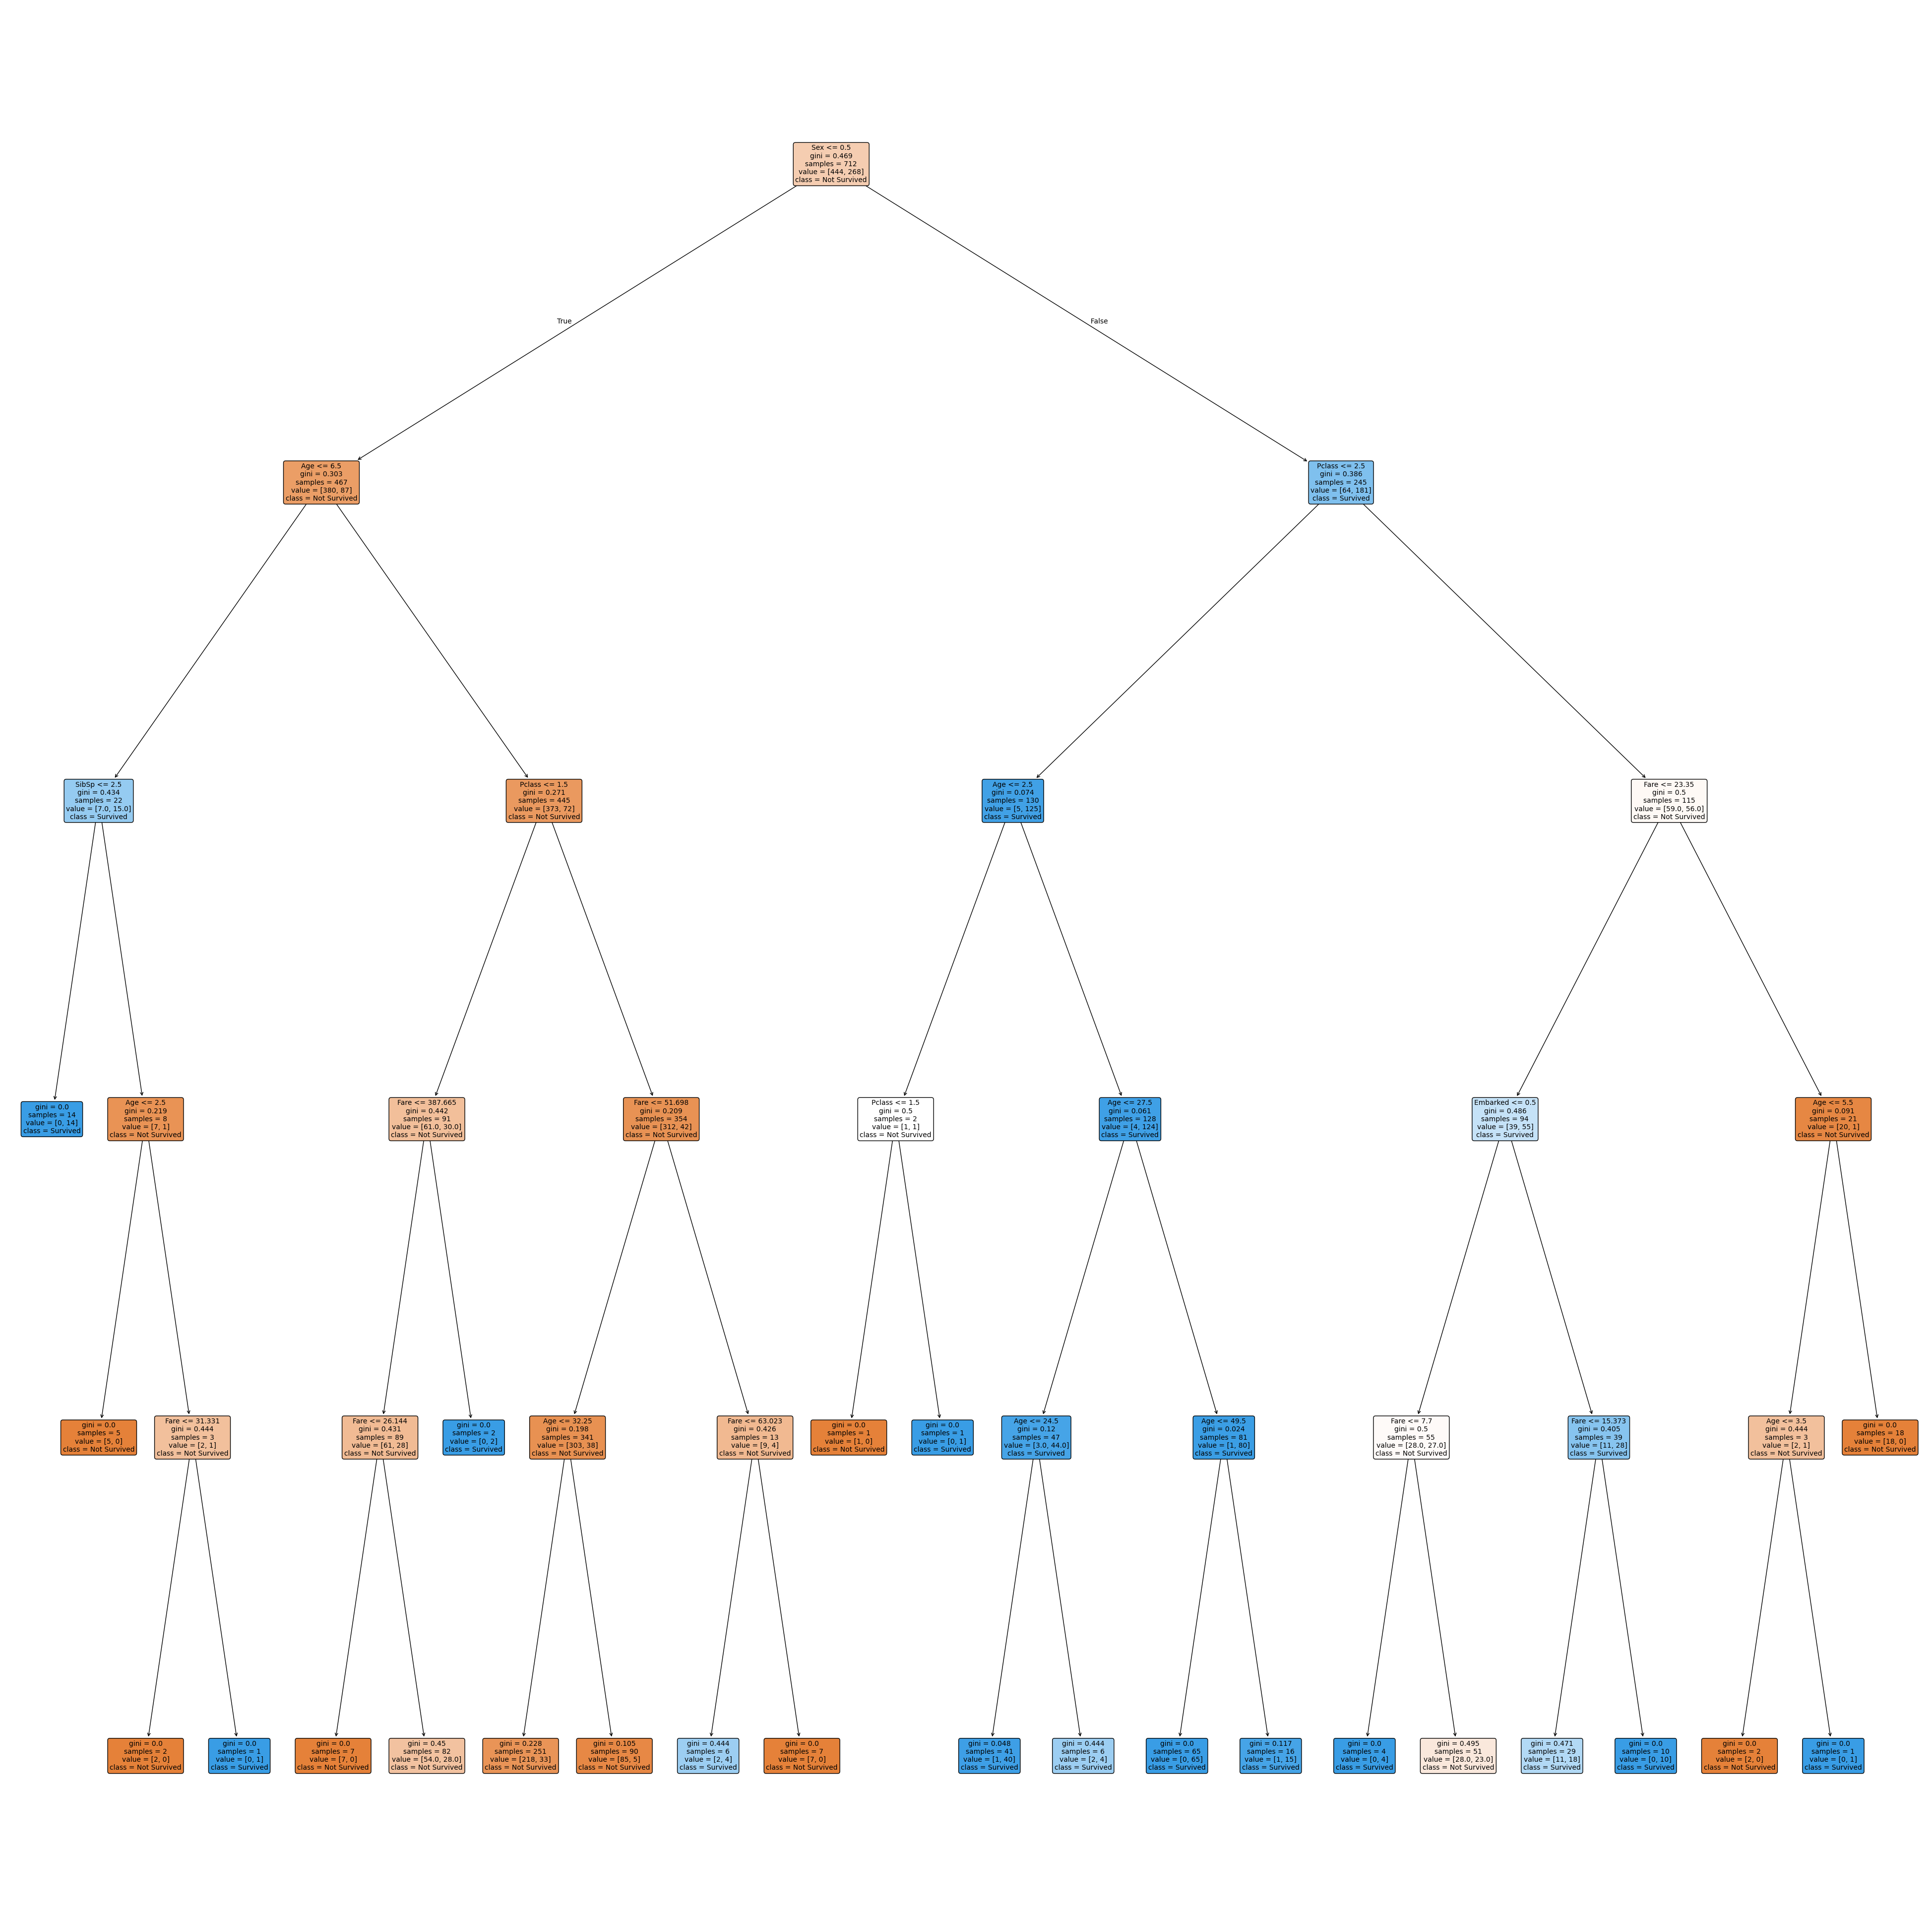

In [186]:
plt.figure(figsize=(50, 50))

tree.plot_tree(
    model,
    feature_names=X.columns,  
    class_names=['Not Survived', 'Survived'],  
    filled=True, 
    rounded=True,  
    fontsize=10
)

plt.show()

In [187]:
importances = model.feature_importances_

feature_importances_df = pd.DataFrame({
    'feature': X_train.columns,  
    'importance': importances 
})

feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)
print(feature_importances_df)

    feature  importance
1       Sex    0.537435
0    Pclass    0.191388
5      Fare    0.124937
2       Age    0.090645
3     SibSp    0.042707
6  Embarked    0.012888
4     Parch    0.000000
